In [1]:

import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [3]:
df=pd.read_csv('Sales_Dataset.csv')
def get_sentiment(Customer_Feedback):
    analysis=TextBlob(Customer_Feedback)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
# Apply the function
df['sentiment']=df['Customer_Feedback'].apply(get_sentiment)
#Save the results
df.to_csv('Sales_Dataset_with_sentiment.csv',index=False)

In [5]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Removing non-alphanumeric characters (fix regex)
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # This removes everything except letters and spaces
    # Tokenization
    words = word_tokenize(text)
    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [11]:
import re
df['cleaned_feedback']=df['Customer_Feedback'].apply(preprocess_text)
#Convert Text to Numerical Representation by using TF-IDF vectorizer
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,2))
#Unigram and Bigram
X=tfidf.fit_transform(df['cleaned_feedback']).toarray()
#Binary classification
y=df['sentiment'].apply(lambda x:1 if x=='positive' else 0)

In [9]:
#Train -Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Train Model
model=MultinomialNB()
model.fit(X_train,y_train)

#Evaluate Model
y_pred=model.predict(X_test)
print("Accuracy_Score:",accuracy_score(y_test,y_pred))

Accuracy_Score: 1.0


In [14]:
df=pd.read_csv('Sales_Dataset_with_sentiment.csv')
print(df)

           Date   Product Region Sales_Channel  Units_Sold  Unit_Price  \
0    2024-07-10   Monitor  South        Retail          27      631.54   
1    2024-07-15   Printer   West     Wholesale          99      233.54   
2    2024-12-04  Keyboard   West     Wholesale          20      463.06   
3    2024-12-04    Tablet  South     Wholesale          29     1440.16   
4    2024-11-06   Monitor  North        Retail          39      350.95   
..          ...       ...    ...           ...         ...         ...   
995  2025-01-10    Laptop   East     Wholesale          62      645.94   
996  2024-12-27    Laptop  South     Wholesale          30     1181.84   
997  2024-11-12   Printer  North        Online          53     1378.21   
998  2025-04-06   Monitor   East        Online          38      749.63   
999  2024-11-02  Keyboard  South        Retail          29      249.95   

      Revenue                    Customer_Feedback sentiment  
0    17051.68               Shipping took too lo

In [16]:
#Supervised
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics  import accuracy_score,classification_report  
# Load dataset
df = pd.read_csv('Sales_Dataset.csv')  # Change to your file name
print(df.head())

df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Product'] = le.fit_transform(df['Product'])
df['Region'] = le.fit_transform(df['Region'])
df['Sales_Channel'] = le.fit_transform(df['Sales_Channel'])

         Date   Product Region Sales_Channel  Units_Sold  Unit_Price  \
0  2024-07-10   Monitor  South        Retail          27      631.54   
1  2024-07-15   Printer   West     Wholesale          99      233.54   
2  2024-12-04  Keyboard   West     Wholesale          20      463.06   
3  2024-12-04    Tablet  South     Wholesale          29     1440.16   
4  2024-11-06   Monitor  North        Retail          39      350.95   

    Revenue                    Customer_Feedback  
0  17051.68               Shipping took too long  
1  23120.07     Not satisfied with the packaging  
2   9261.21           Received a defective piece  
3  41764.60           Received a defective piece  
4  13687.11  Excellent service and fast delivery  


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X = df[['Product', 'Region', 'Sales_Channel', 'Units_Sold', 'Unit_Price']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Random Forest R²:", r2_score(y_test,y_pred_rf))

Linear Regression R²: 0.865359634376316
Random Forest R²: 0.9975945035917625


In [20]:
# Create target column 'Revenue_Label' based on median
median_revenue = df['Revenue'].median()
df['Revenue_Label'] = df['Revenue'].apply(lambda x: 'High' if x > median_revenue else 'Low')

# Drop columns that won't be used for prediction
features = df.drop(columns=['Date', 'Revenue', 'Revenue_Label'])

# Encode categorical features
features_encoded = features.copy()
label_encoders = {}
for col in features_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    features_encoded[col] = le.fit_transform(features_encoded[col])
    label_encoders[col] = le

# Encode target
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(df['Revenue_Label'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Train models
models = {
    'Logistic Regression':LogisticRegression(max_iter=1000)
}
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, preds),
        'report': classification_report(y_test, preds, target_names=target_encoder.classes_)
    }

results

{'Logistic Regression': {'accuracy': 0.94,
  'report': '              precision    recall  f1-score   support\n\n        High       0.93      0.95      0.94       101\n         Low       0.95      0.93      0.94        99\n\n    accuracy                           0.94       200\n   macro avg       0.94      0.94      0.94       200\nweighted avg       0.94      0.94      0.94       200\n'}}

In [22]:
# Create target column 'Revenue_Label' based on median
median_revenue = df['Revenue'].median()
df['Revenue_Label'] = df['Revenue'].apply(lambda x: 'High' if x > median_revenue else 'Low')

# Drop columns that won't be used for prediction
features = df.drop(columns=['Date', 'Revenue', 'Revenue_Label'])

# Encode categorical features
features_encoded = features.copy()
label_encoders = {}
for col in features_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    features_encoded[col] = le.fit_transform(features_encoded[col])
    label_encoders[col] = le

# Encode target
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(df['Revenue_Label'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Train models
models = {
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, preds),
        'report': classification_report(y_test, preds, target_names=target_encoder.classes_)
    }

results


{'Decision Tree': {'accuracy': 0.96,
  'report': '              precision    recall  f1-score   support\n\n        High       0.97      0.95      0.96       101\n         Low       0.95      0.97      0.96        99\n\n    accuracy                           0.96       200\n   macro avg       0.96      0.96      0.96       200\nweighted avg       0.96      0.96      0.96       200\n'}}

In [24]:
# Create target column 'Revenue_Label' based on median
median_revenue = df['Revenue'].median()
df['Revenue_Label'] = df['Revenue'].apply(lambda x: 'High' if x > median_revenue else 'Low')

# Drop columns that won't be used for prediction
features = df.drop(columns=['Date', 'Revenue', 'Revenue_Label'])

# Encode categorical features
features_encoded = features.copy()
label_encoders = {}
for col in features_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    features_encoded[col] = le.fit_transform(features_encoded[col])
    label_encoders[col] = le

# Encode target
target_encoder = LabelEncoder()
target = target_encoder.fit_transform(df['Revenue_Label'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Train models
models = {
    'SVM': SVC()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, preds),
        'report': classification_report(y_test, preds, target_names=target_encoder.classes_)
    }

results


{'SVM': {'accuracy': 0.805,
  'report': '              precision    recall  f1-score   support\n\n        High       0.75      0.93      0.83       101\n         Low       0.91      0.68      0.77        99\n\n    accuracy                           0.81       200\n   macro avg       0.83      0.80      0.80       200\nweighted avg       0.82      0.81      0.80       200\n'}}

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


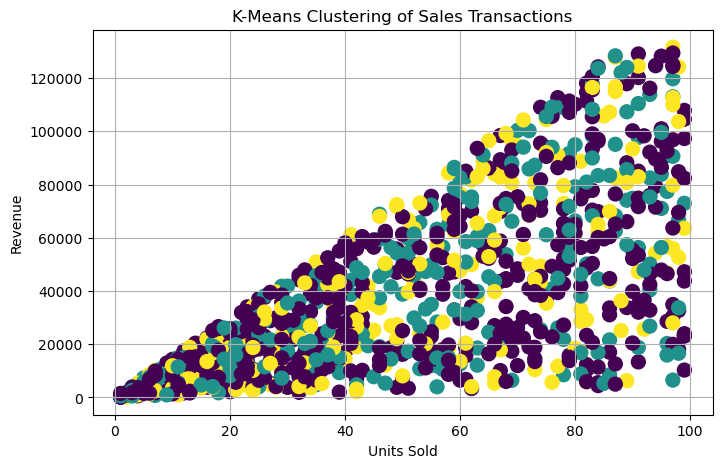

         Units_Sold       Revenue
Cluster                          
0         50.057769  37178.283705
1         50.996337  40324.745385
2         48.764444  38457.928000


In [26]:
#unsupervised 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load your dataset
df = pd.read_csv("Sales_Dataset.csv")

# Step 2: Select relevant columns
data = df[['Units_Sold', 'Revenue', 'Region']]

# Step 3: Convert 'Region' to numbers
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

# Step 4: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 5: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 6: Plot the clusters (using first two features for simplicity)
plt.figure(figsize=(8, 5))
plt.scatter(df['Units_Sold'], df['Revenue'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Units Sold')
plt.ylabel('Revenue')
plt.title('K-Means Clustering of Sales Transactions')
plt.grid(True)
plt.show()

# Step 7: See cluster means
print(df.groupby('Cluster')[['Units_Sold', 'Revenue']].mean())


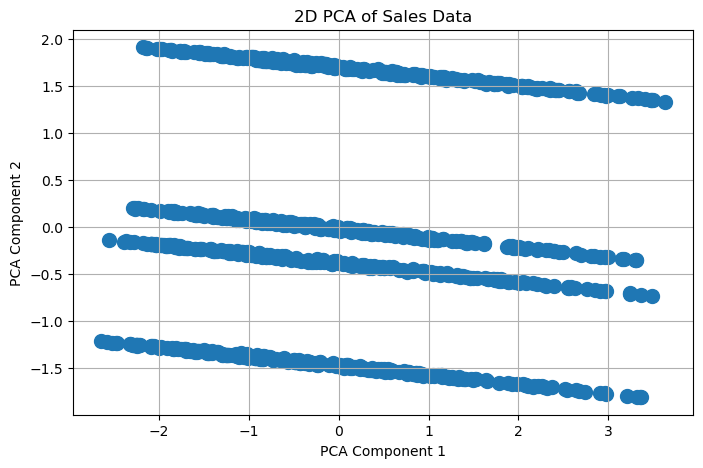

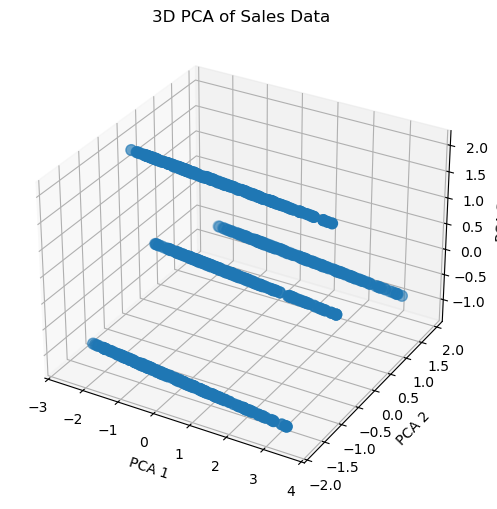

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Load your dataset
df = pd.read_csv("Sales_Dataset.csv")

# Step 2: Select numerical and categorical features
data = df[['Units_Sold', 'Unit_Price', 'Revenue', 'Region']]

# Step 3: Convert 'Region' to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

# Step 4: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 5: PCA - Reduce to 2 components
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(scaled_data)

# Plot 2D
plt.figure(figsize=(8, 5))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], s=100)
plt.title('2D PCA of Sales Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# Step 6: PCA - Reduce to 3 components
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(scaled_data)

# Plot 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2], s=60)
ax.set_title('3D PCA of Sales Data')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()
